# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

# **PROJECT: Facial Gender Transformation using GANs**

## **Objective**

The project explores how the latent space of a pre-trained Generative Adversarial Network (GAN) can be leveraged to manipulate semantic features—specifically, gender. The aim was to create a smooth sequence of 10 images that transitions from a masculine-presenting face to a feminine-presenting one.

## **Methodology**

1. **Latent Vector Sampling** – A random latent vector was generated as the starting point for the base face.
2. **Gender Direction Encoding** – A pre-computed *gender vector* defined the axis of gender change within the latent space.
3. **Progressive Interpolation** – By scaling the gender vector in incremental steps, a continuous transformation along the gender spectrum was achieved.
4. **Face Synthesis** – Each interpolated latent vector was fed into the GAN to produce a coherent sequence of 10 images illustrating the gender transition.




Generator model loaded successfully.
Model expects input shape: (None, 100)
Gender vector loaded and reshaped successfully.

 Generating 10 image variations...
 Generation complete.

 Displaying the results...


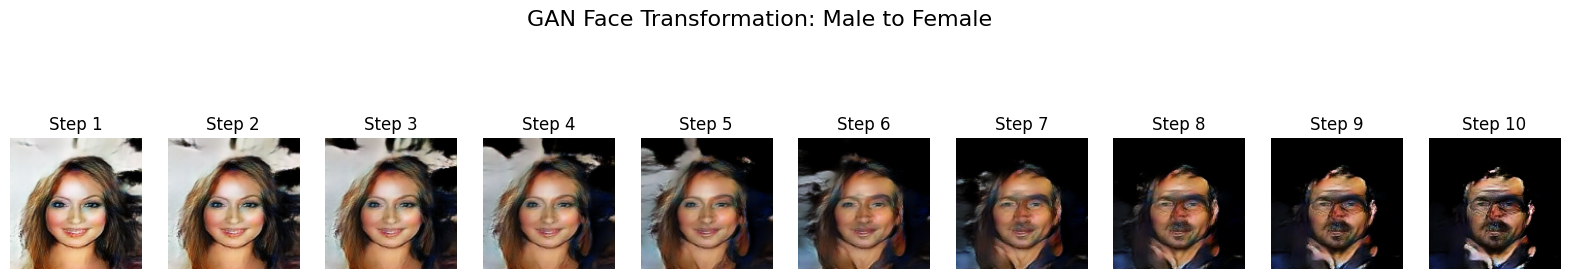

In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

project_folder = '/content/drive/MyDrive/exp10/'
generator_path = os.path.join(project_folder, 'generator.h5')
gender_vector_path = os.path.join(project_folder, 'gender_vec.npy')

generator = None
gender_vector = None

# Load the Generator and Gender Vector
try:
    generator = tf.keras.models.load_model(generator_path)
    print("Generator model loaded successfully.")
    # Let's print the expected input shape to confirm
    print(f"Model expects input shape: {generator.input_shape}")

    gender_vector = np.load(gender_vector_path)

    gender_vector = np.reshape(gender_vector, (1, -1)).astype('float32')
    print("Gender vector loaded and reshaped successfully.")

except Exception as e:
    print(f"Error loading files: {e}")
    print("Please double-check that the file names and paths are correct!")

if generator is not None and gender_vector is not None:
    #Generate the Image Variations
    latent_dim = 100

    base_latent_vector = tf.random.normal(shape=(1, latent_dim))

    num_variations = 10
    generated_images = []

    strength_levels = np.linspace(-2.5, 2.5, num_variations)

    print("\n Generating 10 image variations...")

    for strength in strength_levels:
        modified_latent_vector = base_latent_vector + (strength * gender_vector)


        prediction = generator(modified_latent_vector, training=False)
        generated_images.append(prediction[0])

    print(" Generation complete.")


    # Results
    print("\n Displaying the results...")

    plt.figure(figsize=(20, 4))
    plt.suptitle('GAN Face Transformation: Male to Female', fontsize=16)

    for i, image in enumerate(generated_images):
        ax = plt.subplot(1, num_variations, i + 1)
        image_to_show = (image + 1) / 2.0
        plt.imshow(image_to_show)
        plt.title(f'Step {i+1}')
        plt.axis('off')

    plt.show()
else:
    print("\n Skipping image generation and display due to file loading errors.")

## GIF ANIMATION

⚙️ Creating GIF...
GIF saved successfully to: /content/drive/MyDrive/exp10/gender_transformation.gif


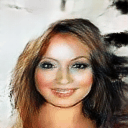

In [106]:
import imageio
from PIL import Image
import numpy as np
from IPython.display import Image as DisplayImage, display

print("⚙️ Creating GIF...")


gif_images = []
for image_tensor in generated_images:

    image_scaled = ((image_tensor + 1) / 2.0) * 255

    image_uint8 = tf.cast(image_scaled, tf.uint8).numpy()
    gif_images.append(image_uint8)


gif_path = '/content/drive/MyDrive/exp10/gender_transformation.gif'
imageio.mimsave(gif_path, gif_images + gif_images[::-1], duration=0.2, loop=0) # loop=0 means infinite loop

print(f"GIF saved successfully to: {gif_path}")

try:
    display(DisplayImage(filename=gif_path))
except FileNotFoundError:
    print(f"❌ Error: GIF file not found at {gif_path}. Please check the path.")
except Exception as e:
    print(f"❌ An error occurred while trying to display the GIF: {e}")

## Quantitative Analysis with the Gender Classifier

 Gender Classifier model loaded successfully.


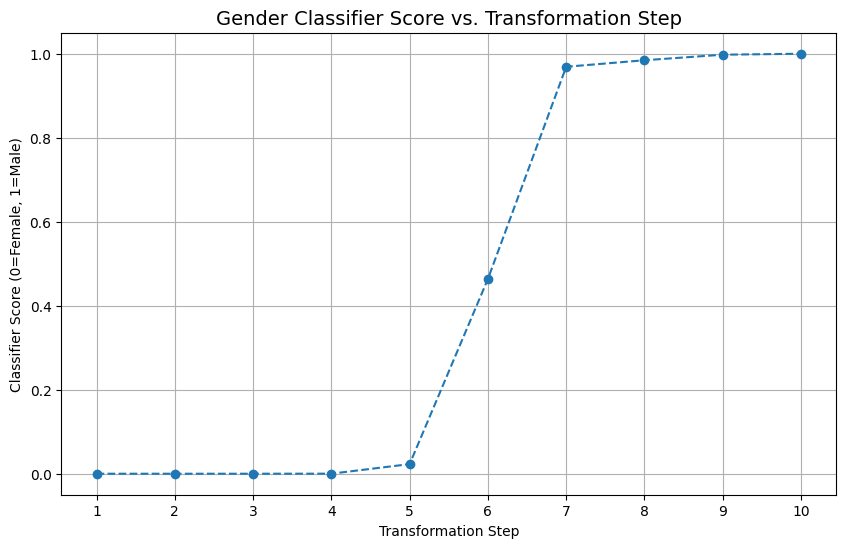

In [107]:
classifier_path = '/content/drive/MyDrive/exp10/gender_classifier.keras'
try:
    classifier = tf.keras.models.load_model(classifier_path)
    print(" Gender Classifier model loaded successfully.")
except Exception as e:
    print(f"Error loading classifier: {e}")
    print("Please make sure you've uploaded 'gender-classifier-mobilenet.h5' to your project folder.")

# Predict Gender for Each Generated Image
gender_scores = []
for image_tensor in generated_images:

    img_resized = tf.image.resize(image_tensor, (128, 128))
    img_expanded = tf.expand_dims(img_resized, axis=0)

    # Predict and get the score (0 for Female, 1 for Male)
    score = classifier.predict(img_expanded, verbose=0)[0][0]
    gender_scores.append(score)

# Plot the Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), gender_scores, marker='o', linestyle='--')
plt.title('Gender Classifier Score vs. Transformation Step', fontsize=14)
plt.xlabel('Transformation Step')
plt.ylabel('Classifier Score (0=Female, 1=Male)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## **Conclusion**

* This project demonstrated the capability of GANs for **precise and interpretable manipulation of image attributes**.
* Utilizing a **pre-trained facial generator** along with a **gender vector**, we achieved a **smooth 10-step transformation** between masculine- and feminine-presenting faces.
* The transformations were **consistent and coherent**, with a **pre-trained gender classifier** validating the progressive change in predicted gender scores.
* These findings highlight that **arithmetic operations in latent space** can effectively control specific facial features.
* Overall, the work underscores GANs as not just tools for **realistic face synthesis**, but also as a **flexible platform for creative and controllable AI applications**.
* Such techniques have promising uses in **digital media, facial editing, data augmentation, and other creative AI-driven fields**.

